References:
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,LSTM
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(11)

In [3]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(path, header=0, index_col=0, squeeze=True)

In [4]:
df.head()

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
Name: Passengers, dtype: int64

In [5]:
# retrieve the values
sequence = df.values.astype('float32')

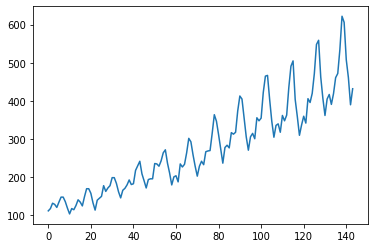

In [6]:
plt.plot(sequence)

In [7]:
def split_sequence(sequence,n_steps):
## split 1d sequence into samples
    x,y = [],[]
    for i in range(len(sequence)-n_steps-1):
        j = i+n_steps
        x.append(sequence[i:j])
        y.append(sequence[j])
        
    return np.array(x),np.array(y)

In [8]:
n_steps = 1
x,y = split_sequence(sequence,n_steps)

In [9]:
sequence[0:10]

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119.],
      dtype=float32)

In [10]:
x[:10]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.]], dtype=float32)

In [11]:
y[:10]

array([118., 132., 129., 121., 135., 148., 148., 136., 119., 104.],
      dtype=float32)

In [12]:
# split into train and test sets
test_size = 0.4

n_samples = x.shape[0]
n_train = int((1-test_size)*n_samples)

x_train, y_train = x[:n_train],y[:n_train] 
x_test, y_test = x[n_train:],y[n_train:]

In [13]:
# reshape into [samples, timesteps, features]
#x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))

# with time steps
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [14]:
# define model
model = Sequential()
#model.add(LSTM(32, activation='relu', kernel_initializer='he_normal', input_shape=(1, n_steps)))
# with time steps
model.add(LSTM(32, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps, 1)))

model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


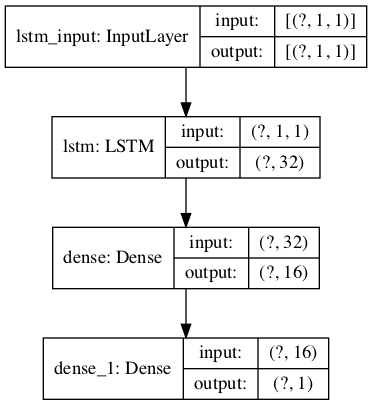

In [16]:
plot_model(model, 'model_RNN.png', show_shapes=True)

In [17]:
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [18]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2,verbose=0)

Text(0.5, 0, 'epoch')

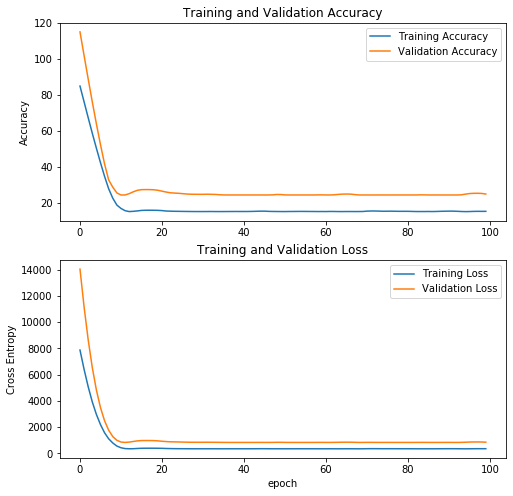

In [19]:
# Learning curves
acc = history.history['mae']
val_acc = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

In [20]:
# make predictions
y_pred = model.predict(x_test)

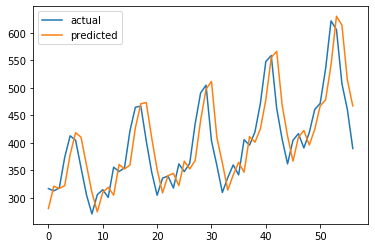

In [21]:
plt.plot(y_test,label='actual')
plt.plot(y_pred,label='predicted')
plt.legend()